In [1]:
# Created 2016, Zack Gainsforth
%pylab inline

import sys, os
import QuickPlot
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 8, 6  # that's default image size for this interactive session

Populating the interactive namespace from numpy and matplotlib


/Users/Zack/anaconda/envs/conda36/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


mbare=-0.322281
mscreen=-0.151824
Uscf=3.483684


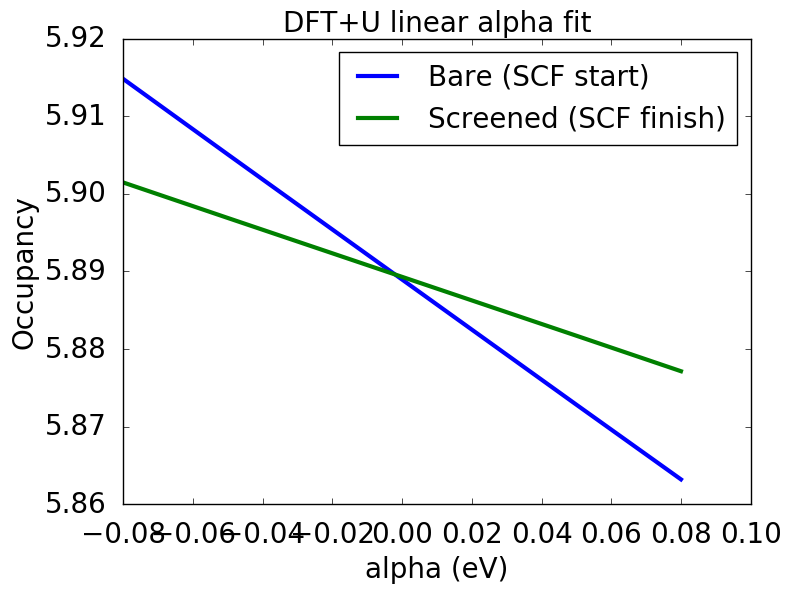

In [16]:
# Example from http://hjklol.mit.edu/content/calculating-hubbard-u
# Using MnO, with U=0 and alpha -0.08 to 0.08

# alpha, SCF start, SCF end
x = np.array([[-0.08, 5.914787, 5.901457],
              [-0.05, 5.905068, 5.896886],
              [ 0.05, 5.872840, 5.881723],
              [ 0.08, 5.863222, 5.877153]
              ])
fig,ax = QuickPlot.QuickPlot(x[:,0], x[:,1], boldlevel=3)
QuickPlot.QuickPlot(x[:,0], x[:,2], boldlevel=3,
         figax=(fig,ax),
         title='DFT+U linear alpha fit',
         xlabel='alpha (eV)',
         ylabel='Occupancy',
         legendstrs=['Bare (SCF start)', 'Screened (SCF finish)'])

mbare,bbare = np.polyfit(x[:,0], x[:,1], 1)
mscreen,bscreen = np.polyfit(x[:,0], x[:,2], 1)

print('mbare=%f'%mbare)
print('mscreen=%f'%mscreen)
print('Uscf=%f'%(1/mbare - 1/mscreen))



mbare=-0.192477
mscreen=-0.078087
Uscf=7.610783


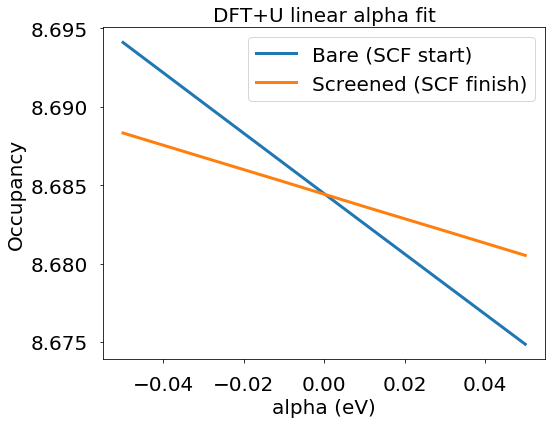

In [10]:
# Ni in NiO

# alpha, SCF start, SCF end
x = np.array([[-0.05, 8.694105, 8.688330],
              [-0.03, 8.690243, 8.686773],
              [-0.01, 8.686388, 8.685218],
              [0.01, 8.682538, 8.683637],
              [0.03, 8.678695, 8.682088],
              [0.05, 8.674857, 8.680525],
             ])
fig,ax = QuickPlot.QuickPlot(x[:,0], x[:,1], boldlevel=3)
QuickPlot.QuickPlot(x[:,0], x[:,2], boldlevel=3,
         figax=(fig,ax),
         title='DFT+U linear alpha fit',
         xlabel='alpha (eV)',
         ylabel='Occupancy',
         legendstrs=['Bare (SCF start)', 'Screened (SCF finish)'])

mbare,bbare = np.polyfit(x[:,0], x[:,1], 1)
mscreen,bscreen = np.polyfit(x[:,0], x[:,2], 1)

print('mbare=%f'%mbare)
print('mscreen=%f'%mscreen)
print('Uscf=%f'%(1/mbare - 1/mscreen))

